In [1]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt 
plt.gray()


<Figure size 640x480 with 0 Axes>

uint8


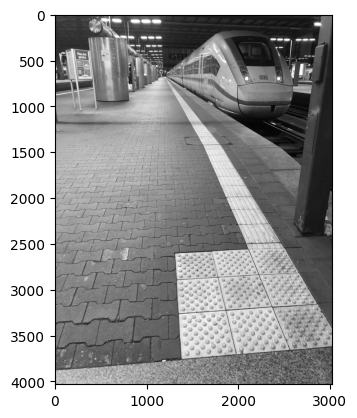

In [16]:
image_path = 'C:\\Users\\leonh\\Documents\\GitHub\\project_bums\\Test_Bilder\\MUC_BHF_3.jpg'
img = cv2.imread(image_path, 0)
plt.imshow(img)

print(img.dtype)

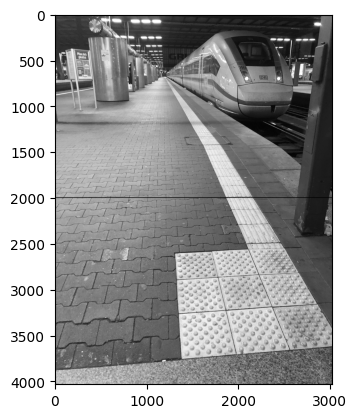

In [3]:
def create_horizontal_line(image, y_position, color=(0, 0, 255), thickness=5):
    line_image = np.array(image)
    cv2.line(line_image, (0, y_position), (image.shape[1], y_position), color, thickness)
    return line_image


y_position = 2000  # Y-Position der horizontalen Linie

line_image = create_horizontal_line(img, y_position)

plt.imshow (line_image)

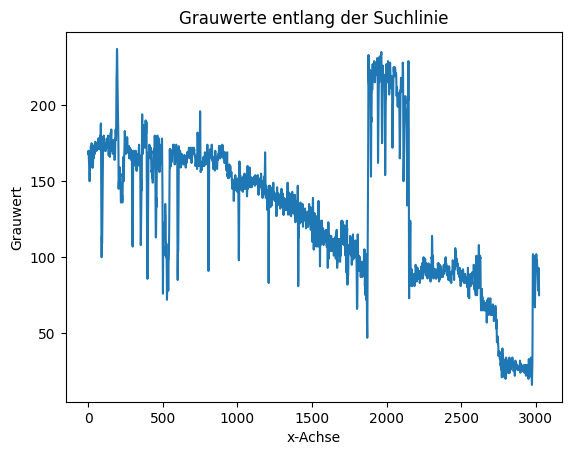

In [4]:
def grayscale_values(image, y_position):
    # Linienbild erstellen
    line_image = create_horizontal_line(image, y_position)

    # x-Achse und Grauwerte initialisieren
    x_values = np.arange(image.shape[1])
    gray_values = []

    # Grauwerte entlang der Linie sammeln
    for x in x_values:
        gray_values.append(image[y_position, x])

    return gray_values, x_values


# Plot erstellen
def plot_values (gray_values, x_values):
    plt.plot(x_values, gray_values)
    plt.title('Grauwerte entlang der Suchlinie')
    plt.xlabel('x-Achse')
    plt.ylabel('Grauwert')
    plt.show()

gray_values, x_values = grayscale_values(img, y_position);
plot_values (gray_values, x_values)

[]


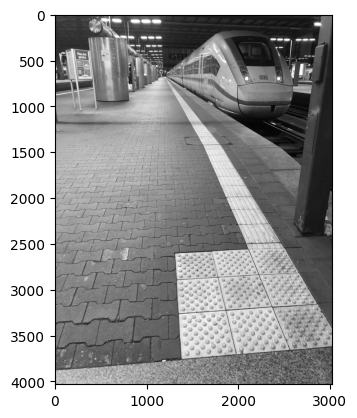

In [5]:
def detect_gray_value_change1(image, threshold=100, min_distance=3, min_range=250, max_range=550):
    gray_values = image.astype(np.int32)  # Konvertiere Bild in Ganzzahl-Datentyp für Berechnungen

    change_positions = []  # Speichert die Positionen der Grauwertänderungen
    current_range = 0  # Aktueller Bereich der Grauwertänderung

    for i in range(len(gray_values)-1):
        diff = abs(gray_values[i+1] - gray_values[i])
        if any(diff) > threshold:
            if current_range >= min_range and current_range <= max_range:
                change_positions.append(i)
            current_range = 0
        else:
            current_range += 1

        if current_range > min_distance:
            current_range = 0

    return change_positions

change_positions = detect_gray_value_change1(img)

# Markiere die Positionen der Grauwertänderungen im Bild
marked_image = np.copy(img)
for position in change_positions:
    cv2.circle(marked_image, (position, img.shape[0]//2), 10, (255, 0, 0), -10)

print(change_positions)
plt.imshow(marked_image)

In [6]:
def detect_gray_value_changes(image, y_position, threshold_min=45, threshold_max=150, max_distance=85, min_distance=25):
    # Linienbild erstellen
    #line_image = create_horizontal_line(image, y_position)

    # x-Achse und Grauwerte initialisieren
    x_values = np.arange(image.shape[1])
    gray_values = []

    # Grauwerte entlang der Linie sammeln
    for x in x_values:
        gray_values.append(image[y_position, x])

    # Grauwertänderungen und zugehörige x-Positionen sammeln
    gray_changes = []
    change_positions = []
    prev_value = gray_values[0]
    prev_position_wright = 0
    prev_position = 0

    for i in range(1, len(gray_values)):
        current_value = gray_values[i]
        if threshold_min < abs(current_value - prev_value) < threshold_max:
            
            if min_distance < (i - prev_position) < max_distance:
                gray_changes.append(current_value - prev_value)
                #change_positions.append(i)
                change_positions.append((i, y_position))
                prev_value = current_value
                prev_position = i
                prev_position_wright = i
            else : 
                prev_position = i

    return gray_changes, change_positions

y_position_1 = 1500
y_position_2 = 2000

gray_changes1, change_positions1 = detect_gray_value_changes(img, y_position_1)
gray_changes2, change_positions2 = detect_gray_value_changes(img, y_position_2)

gray_changes = gray_changes1 + gray_changes2
change_positions = change_positions1 + change_positions2

print("Grauwertänderungen: ", gray_changes)
print("Positionen der Änderungen: ", change_positions)


Grauwertänderungen:  [47, 145, 50, 112]
Positionen der Änderungen:  [(1789, 1500), (1850, 1500), (2097, 2000), (2151, 2000)]


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_17624\1071035895.py:22: RuntimeWarning: overflow encountered in scalar subtract
  if threshold_min < abs(current_value - prev_value) < threshold_max:
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_17624\1071035895.py:25: RuntimeWarning: overflow encountered in scalar subtract
  gray_changes.append(current_value - prev_value)


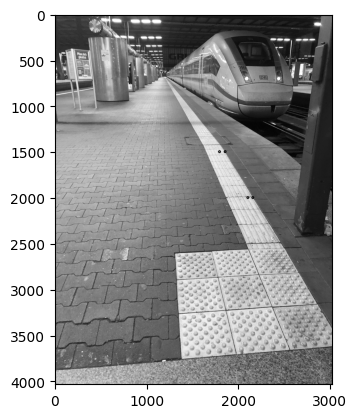

In [7]:
# Markiere die Positionen der Grauwertänderungen im Bild
out_image = np.copy(img)
for position in change_positions:
    cv2.circle(out_image, position, 10, (0, 0, 255), 10)

plt.imshow(out_image)

[1.6233766233766234, 1.6611295681063123]
[-1404.2207792207791, -1573.089700996678]


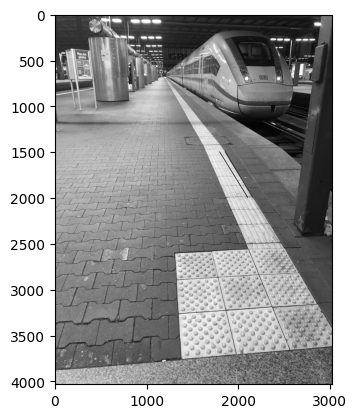

In [8]:
m = []
c = []
for i in range(2):
    out=cv2.line(img, change_positions1[-i], change_positions2[-i], (0, 0, 255), 6)

    #Steigung berechnen
    m.append((change_positions1[i][1]-change_positions2[i][1])/(change_positions1[i][0]-change_positions2[i][0]))
    #y-Schnittpunkt berechnen
    c.append(change_positions1[i][1] -m[i]*change_positions1[i][0])

    # Gerade1: y1 = m[0]*x1 + c[0]
    # Gerade2: y2 = m[1]*x2 + c[1]

print(m)
print(c)
plt.imshow(out)

In [18]:
def set_pixel_to_black(image, x, y):
    image[y, x] = np.zeros(3, dtype='uint8')  # Setze den Pixel auf Schwarz

    return image

set_pixel_to_black(img, 100, 100)

ValueError: setting an array element with a sequence.

In [26]:
def set_pixels_to_zero(image, slope_left, intercept_left, slope_right, intercept_right):
    height, width = image.shape
    
    for y in range(height):
        for x in range(width):
            if y <= slope_left * x + intercept_left and y >= slope_right * x + intercept_right:
                image[y, x] = [0, 0, 0]  # Setze den Pixel auf Schwarz
    
    return image

blacken_img = set_pixels_to_zero(img, m[0], c[0], m[1], c[1])

plt.imshow(blacken_img)

ValueError: setting an array element with a sequence.